# Reinforcement Learning Models of Social Group Preferences
## Bandit Experiments 1-7

In [1]:
# imports / display plots in cell output
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
import pandas as pd
import seaborn as sns
import statsmodels

## Experiment 1: between subjects design
-participants randomly assigned to receive only 'gems' or 'bomb' type rewards

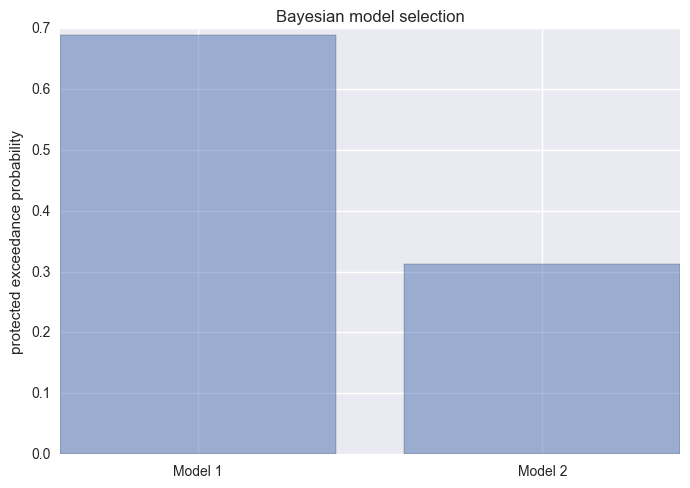

In [6]:
# Bayesian Model Selection (bor = .6240)
# Model 1: inverse temperature, stickiness, learning rate
# Model 2: inverse temperature, stickiness, positive learning rate, negative learning rate
models = ('Model 1', 'Model 2')
y_pos = np.arange(len(models))
pxp = [0.6880, 0.3120]
plt.bar(y_pos, pxp, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('protected exceedance probability')
plt.title('Bayesian model selection')
plt.show()

In [7]:
# import post-mfit b1 (bandit_either) summary data
#b1 = pd.read_csv('/Volumes/crisp/hinl/bandit/gems_vs_bomb/rez/b1_d100_table.csv')
b1 = pd.read_csv('~/Desktop/bandit/gems_vs_bomb/rez/b1_d100_table.csv')
b1 = b1.drop('subID', axis=1)
data = pd.DataFrame(b1)
data.describe()

,payout,it,lr,sticky,rt_mean,rt_tot
count,208.000000,208.000000,208.000000,208.000000,208.000000,2.080000e+02
mean,105.187500,6.590912,0.579132,0.977115,404.951763,1.457826e+05
std,15.437843,3.392418,0.246023,1.143328,463.279102,1.667805e+05
min,70.000000,0.606764,0.000256,-3.620414,69.797222,2.512700e+04
25%,95.000000,4.151138,0.438162,0.267652,182.443750,6.567975e+04
50%,104.000000,6.099496,0.601137,1.082933,246.231944,8.864350e+04
75%,112.500000,8.295492,0.749011,1.782476,413.850000,1.489860e+05
max,150.000000,18.074366,0.997111,3.789444,3169.880556,1.141157e+06


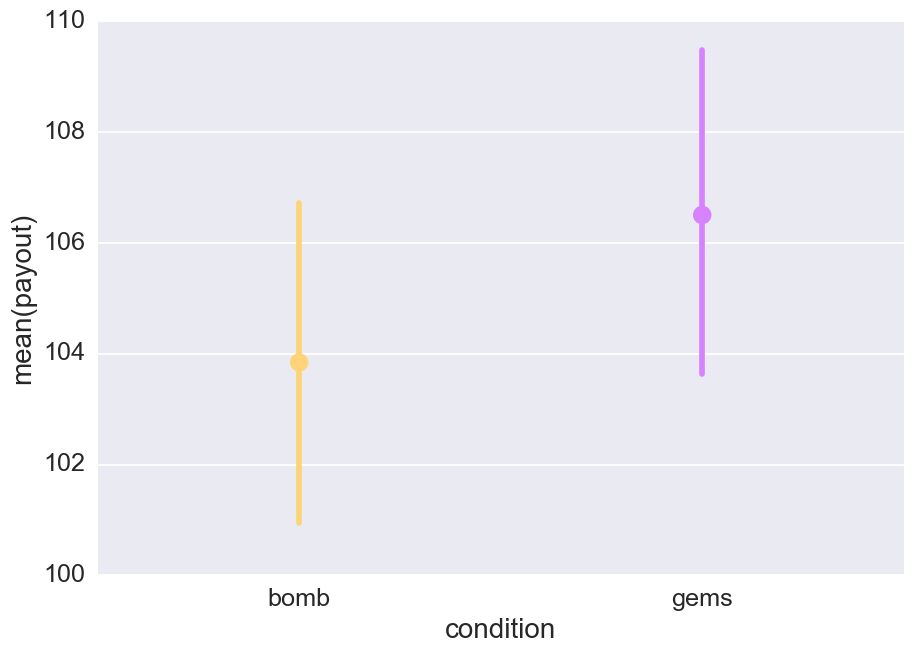

In [8]:
# plot differences in payout
with sns.plotting_context('talk', font_scale=1.4):

     sns.set_style("darkgrid")
     ax = sns.pointplot(data=b1, x='condition', y='payout', palette = ['#FFD479','#D783FF'])
     ax.figure.get_axes()[0].set_xticklabels(['bomb','gems'])
     #ax.figure.savefig('b1_pointplot')

## Experiment 2: within subjects design
-participants receive either 'gems' or 'bomb' type reward on each trial  
-reward type for each door determined by fixed probability [0.8 0.6 0.4 0.2]

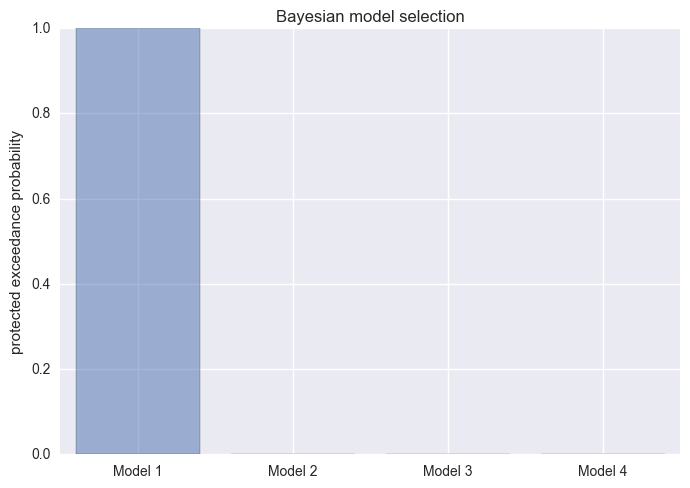

In [9]:
# Bayesian Model Selection (bor = .778e-21)
# Model 1: inverse temperature, stickiness, learning rate
# Model 2: inverse temperature, stickiness, gems learning rate, bomb learning rate
# Model 3: inverse temperature, stickiness, positive learning rate, negative learning rate
# Model 4: inverse temperature, stickiness, learning rate, gems preference
models = ('Model 1', 'Model 2', 'Model 3', 'Model 4')
y_pos = np.arange(len(models))
pxp = [1, 0, 0, 0]
plt.bar(y_pos, pxp, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('protected exceedance probability')
plt.title('Bayesian model selection')
plt.show()

In [10]:
# import post-mfit b2 (bandit_either) summary data
#b2 = pd.read_csv('/Volumes/crisp/hinl/bandit/gems_vs_bomb/rez/b2_d100_table.csv')
b2 = pd.read_csv('~/Desktop/bandit/gems_vs_bomb/rez/b2_d100_table.csv')
b2 = b2.drop('subID', axis=1)
data = pd.DataFrame(b2)
data.describe()

,gems,bomb,pGems,chose80,chose60,chose40,chose20,it,lr,sticky
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,50.672840,48.574074,0.513471,0.272171,0.254132,0.242575,0.231121,6.495081,0.493145,1.152625
std,8.826013,9.003661,0.046526,0.094960,0.072796,0.071436,0.068968,4.160503,0.288417,1.042405
min,29.000000,22.000000,0.396111,0.044444,0.036111,0.036111,0.025000,1.038457,0.000880,-2.115228
25%,44.000000,43.000000,0.485417,0.211806,0.214583,0.203472,0.191667,4.001160,0.312575,0.515296
50%,50.500000,48.000000,0.510556,0.265278,0.250000,0.247222,0.231944,5.609003,0.547529,1.355445
75%,57.000000,54.750000,0.537222,0.320833,0.296528,0.277778,0.269444,7.974248,0.701536,1.858879
max,71.000000,68.000000,0.706667,0.761111,0.541667,0.463889,0.413889,32.159364,0.993634,2.989728


### Experiment 2: inferrential stats   

paired t-test b/w gems & bombs: _t_ = 1.86, _p_ = 0.065

repeated measures ANOVA across doors: _F_ = 6.17, _p_ = 0.0004

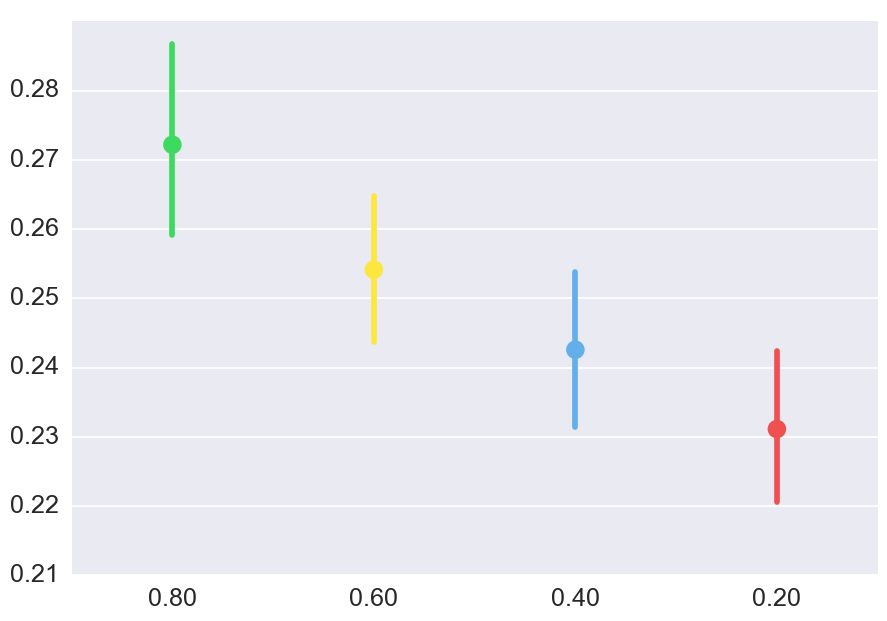

In [11]:
# plot preference for gems in terms of door probability
pDoor = b2[['chose80','chose60','chose40','chose20']]

with sns.plotting_context('talk', font_scale=1.4):

    sns.set_style("darkgrid")
    ax = sns.pointplot(data=pDoor, palette = ['#3DDA60','#fde73f','#62afea','#EF5050'])
    ax.figure.get_axes()[0].set_xticklabels(['0.80','0.60','0.40','0.20'])
    #ax.figure.savefig('b2_pointplot')

## Experiment 3: narrative w/ low reward probability
-participants receive either 'gems' or 'bomb' type reward on each trial  
-reward type for each door determined by fixed probability [0.8 0.6 0.4 0.2]  
-intergroup bias computed by subtracting outgroup ID from ingroup ID

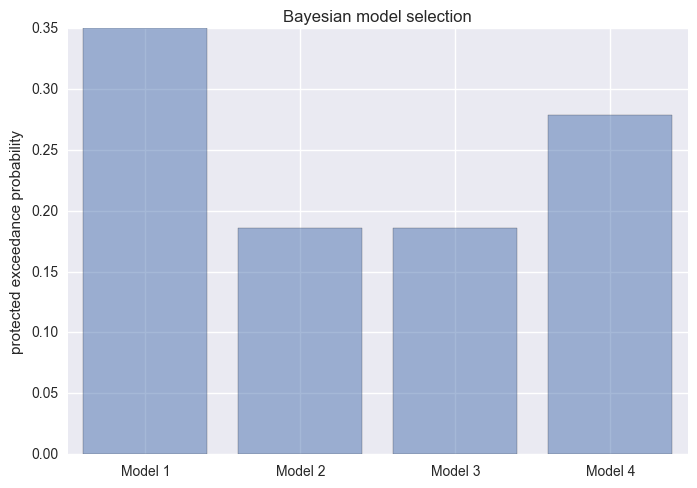

In [12]:
# Bayesian Model Selection (bor = .7427)
# Model 1: inverse temperature, stickiness, learning rate
# Model 2: inverse temperature, stickiness, gems learning rate, bomb learning rate
# Model 3: inverse temperature, stickiness, positive learning rate, negative learning rate
# Model 4: inverse temperature, stickiness, learning rate, gems preference
models = ('Model 1', 'Model 2', 'Model 3', 'Model 4')
y_pos = np.arange(len(models))
pxp = [0.3497, 0.1857, 0.1857, 0.2789]
plt.bar(y_pos, pxp, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('protected exceedance probability')
plt.title('Bayesian model selection')
plt.show()

In [14]:
# import post-mfit b3 (bandit_either) summary data
#b3 = pd.read_csv('/Volumes/crisp/hinl/bandit/gems_vs_bomb/clean/b3_d100_table.csv')
b3 = pd.read_csv('~/Desktop/bandit/gems_vs_bomb/rez/b3_d100_table.csv')
b3 = b3.drop('subID', axis=1)
data = pd.DataFrame(b3)
data.describe()

,gems,bomb,igbias,pGems,wGems,chose80,chose60,chose40,chose20,it,lr,sticky
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,51.756250,48.243750,2.363542,0.522413,0.617347,0.296215,0.242240,0.238941,0.222604,10.918244,0.539298,1.162176
std,9.367915,9.678315,2.672352,0.056627,0.192162,0.119410,0.074170,0.065959,0.077237,4.925971,0.249155,1.104260
min,31.000000,18.000000,-4.500000,0.413333,0.154795,0.130556,0.000000,0.052778,0.041667,1.600555,0.003745,-2.720556
25%,45.000000,43.000000,0.000000,0.488611,0.478149,0.229861,0.202778,0.200000,0.180556,7.098115,0.418109,0.607309
50%,51.000000,48.000000,2.000000,0.515556,0.570844,0.272222,0.244444,0.238889,0.226389,10.621770,0.563915,1.236374
75%,58.000000,53.000000,5.000000,0.541250,0.690734,0.319444,0.283333,0.280556,0.269444,14.320732,0.712873,1.905327
max,77.000000,85.000000,6.000000,0.716667,0.998053,0.830556,0.463889,0.419444,0.458333,25.181646,0.995920,3.268465


### Experiment 3: inferrential stats   

paired t-test b/w gems & bombs: _t_ = 2.79, _p_ = 0.006

repeated measures ANOVA across doors: _F_ = 16.33, _p_ < 0.0000

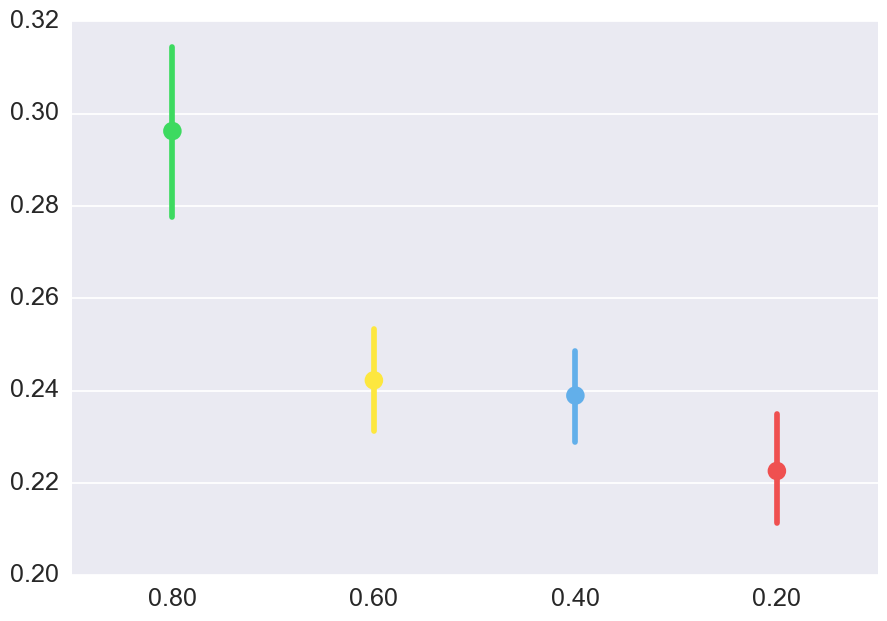

In [15]:
# plot preference for gems in terms of door probability
pDoor = b3[['chose80','chose60','chose40','chose20']]

with sns.plotting_context('talk', font_scale=1.4):

    sns.set_style("darkgrid")
    ax = sns.pointplot(data=pDoor, palette = ['#3DDA60','#fde73f','#62afea','#EF5050'])
    ax.figure.get_axes()[0].set_xticklabels(['0.80','0.60','0.40','0.20'])
    #ax.figure.savefig('b2_pointplot')

/Users/wem3/Envs/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


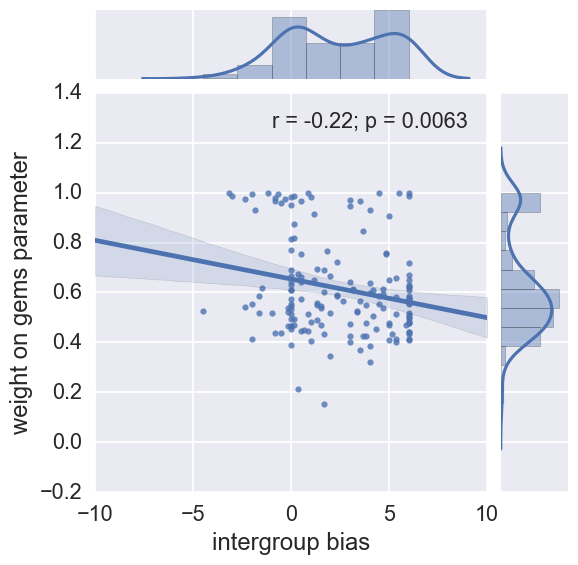

In [43]:
# regression of intergroup bias on model-based preference for gems
data = b3[['igbias','wGems']]
with sns.plotting_context('talk', font_scale=1.2):
    ax = (sns.jointplot(x='igbias', y='wGems', data=data, kind='reg', annot_kws=dict(stat='r'))
                       .set_axis_labels('intergroup bias', 'weight on gems parameter'))
    ax.savefig('b3_igbias_wGems')

/Users/wem3/Envs/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


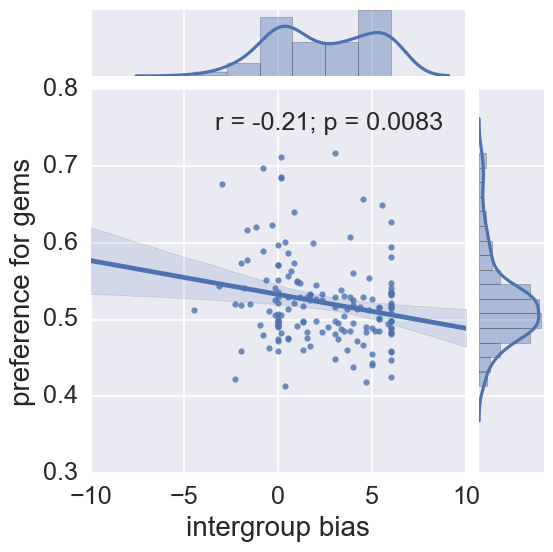

In [17]:
# regression of intergroup bias on preference for gems
data = b3[['igbias','pGems']]
with sns.plotting_context('talk', font_scale=1.4):
    ax = (sns.jointplot(x='igbias', y='pGems', data=data, kind='reg', annot_kws=dict(stat='r'))
                       .set_axis_labels('intergroup bias', 'preference for gems'))
    #ax.savefig('b3_igbias_pGems')

## Experiment 4: narrative w/ multiple reward outcomes
-participants can receive either 'gems' **and/or** 'bomb' type reward on each trial  
-reward type for each door determined by independent drifting probabilities for gems and bomb  
-intergroup bias computed by subtracting outgroup ID from ingroup ID

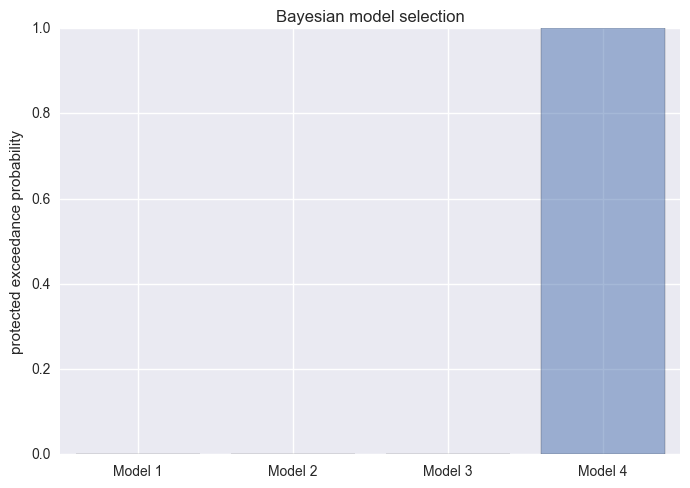

In [18]:
# Bayesian Model Selection (bor = 9.7058e-11)
# Model 1: inverse temperature, stickiness, learning rate
# Model 2: inverse temperature, stickiness, gems learning rate, bomb learning rate
# Model 3: inverse temperature, stickiness, positive learning rate, negative learning rate
# Model 4: inverse temperature, stickiness, learning rate, gems preference
models = ('Model 1', 'Model 2', 'Model 3', 'Model 4')
y_pos = np.arange(len(models))
pxp = [2.4264e-11, 2.4264e-11, 2.4264e-11, 1.0000]
plt.bar(y_pos, pxp, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('protected exceedance probability')
plt.title('Bayesian model selection')
plt.show()

In [21]:
# import post-mfit b4 (bandit_double) summary data
#b4 = pd.read_csv('/Volumes/crisp/hinl/bandit/gems_vs_bomb/rez/b4_d100_table.csv')
b4 = pd.read_csv('~/Desktop/bandit/gems_vs_bomb/rez/b4_best_table.csv')
b4 = b4.drop('subID', axis=1)
data = pd.DataFrame(b4)
data.describe()

,gems,bomb,igbias,wGems,it,lr,sticky,rt_mean,rt_tot
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,98.213836,94.993711,2.128931,0.673819,7.606354,0.631356,1.155607,437.429874,157474.754717
std,10.134141,11.484440,2.436386,0.193425,4.376166,0.223408,0.909335,339.284852,122142.546879
min,69.000000,67.000000,-4.833333,0.042825,0.688342,0.009612,-1.750565,76.075000,27387.000000
25%,92.000000,88.000000,0.000000,0.534406,4.528313,0.523059,0.532596,242.990278,87476.500000
50%,97.000000,96.000000,1.833333,0.628018,6.799249,0.642770,1.298711,352.005556,126722.000000
75%,105.500000,103.000000,3.916667,0.802756,9.953950,0.775285,1.702816,506.975000,182511.000000
max,121.000000,121.000000,6.000000,0.998410,30.720417,0.994118,3.320907,2468.427778,888634.000000


### Experiment 4: inferrential stats   

paired t-test b/w gems & bombs: _t_ = 2.69, _p_ = 0.0079

## Experiment 5: narrative w/ high reward probability  
-participants receive either 'gems' or 'bomb' type reward on each trial  
-reward type for each door determined by fixed probability [0.8 0.6 0.4 0.2]  
-intergroup bias computed by subtracting outgroup ID from ingroup ID  
-probability of reward twice as high as in Experiment 3

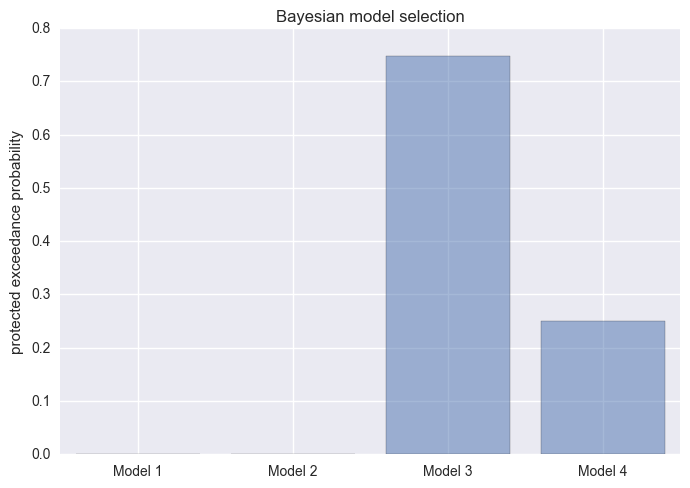

In [23]:
# Bayesian Model Selection (bor = .0052)
# Model 1: inverse temperature, stickiness, learning rate
# Model 2: inverse temperature, stickiness, gems learning rate, bomb learning rate
# Model 3: inverse temperature, stickiness, positive learning rate, negative learning rate
# Model 4: inverse temperature, stickiness, learning rate, gems preference
models = ('Model 1', 'Model 2', 'Model 3', 'Model 4')
y_pos = np.arange(len(models))
pxp = [0.0013, 0.0013, 0.7480, 0.2494]
plt.bar(y_pos, pxp, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('protected exceedance probability')
plt.title('Bayesian model selection')
plt.show()

In [25]:
# import post-mfit b5 (bandit_either) summary data
#b5 = pd.read_csv('/Volumes/crisp/hinl/bandit/gems_vs_bomb/rez/b5_d100_table.csv')
b5 = pd.read_csv('~/Desktop/bandit/gems_vs_bomb/rez/b5_d100_table.csv')
data = pd.DataFrame(b5)
data.describe()

,subID,gems,bomb,igbias,pGems,wGems,chose80,chose60,chose40,chose20,it,lr,sticky
count,1.440000e+02,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,4.269511e+07,112.861111,101.777778,2.326389,0.529753,0.612368,0.306674,0.250154,0.228434,0.214738,10.512226,0.677112,1.119738
std,2.580464e+07,18.291582,22.974734,2.390482,0.068553,0.190407,0.141462,0.088360,0.092720,0.105534,4.765983,0.199058,1.056101
min,2.711490e+05,40.000000,24.000000,-3.166667,0.222778,0.192474,0.030556,0.000000,0.000000,0.000000,1.175973,0.006522,-1.993973
25%,2.287964e+07,101.000000,85.000000,0.000000,0.488750,0.486492,0.216667,0.188889,0.165972,0.152778,7.125326,0.574496,0.492553
50%,4.216666e+07,113.000000,102.000000,2.250000,0.515556,0.565774,0.291667,0.247222,0.225000,0.213889,9.957198,0.707677,1.241818
75%,6.475296e+07,122.250000,117.250000,4.666667,0.566944,0.687863,0.372917,0.300000,0.278472,0.278472,13.938157,0.803626,1.860440
max,8.889695e+07,162.000000,153.000000,6.000000,0.800000,0.998956,1.000000,0.588889,0.472222,0.955556,27.273717,0.996590,3.339920


### Experiment 5: inferrential stats   

paired t-test b/w gems & bombs: _t_ = 4.28, _p_ < 0.0000

repeated measures ANOVA across doors: _F_ = 18.986, _p_ < 0.0000

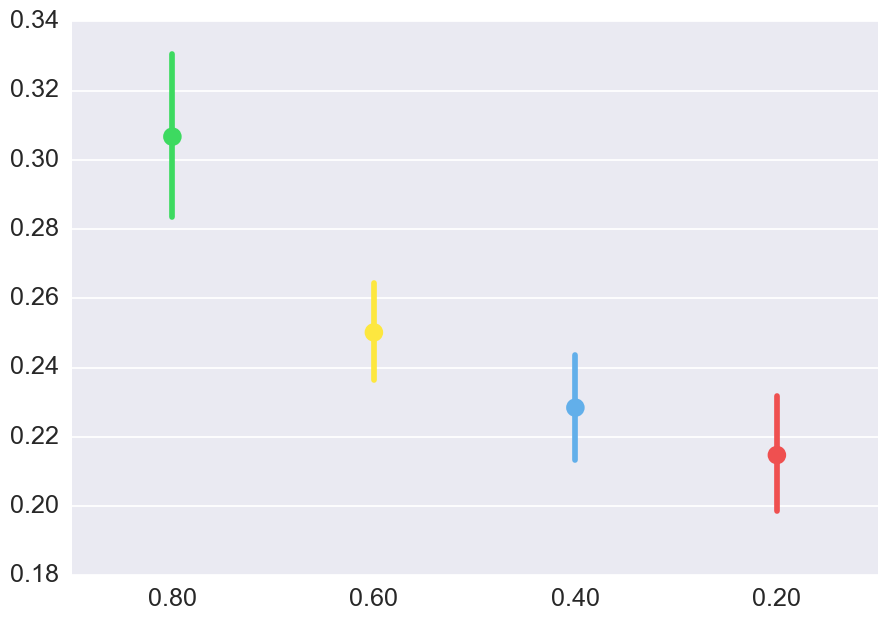

In [26]:
# plot preference for gems in terms of door probability
pDoor = b5[['chose80','chose60','chose40','chose20']]

with sns.plotting_context('talk', font_scale=1.4):

    sns.set_style("darkgrid")
    ax = sns.pointplot(data=pDoor, palette = ['#3DDA60','#fde73f','#62afea','#EF5050'])
    ax.figure.get_axes()[0].set_xticklabels(['0.80','0.60','0.40','0.20'])
    ax.figure.savefig('b5_pointplot')

/Users/wem3/Envs/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


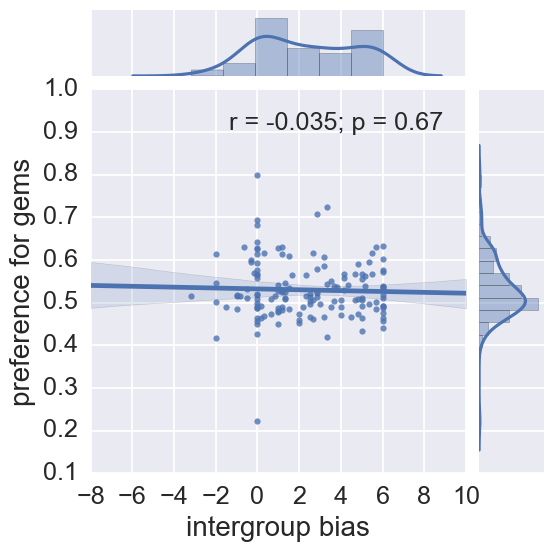

In [35]:
# regression of intergroup bias on preference for gems
data = b5[['igbias','pGems']]
with sns.plotting_context('talk', font_scale=1.4):
    ax = (sns.jointplot(x='igbias', y='pGems', data=data, kind='reg', annot_kws=dict(stat='r'))
                       .set_axis_labels('intergroup bias', 'preference for gems'))
    ax.savefig('b5_igbias_pGems')

## Experiment 6: political party w/ low reward probability  
-participants receive either 'bill' or 'burning bill' type reward on each trial  
-reward type for each door determined by fixed probability [0.8 0.6 0.4 0.2]  
-intergroup bias computed by subtracting outgroup ID from ingroup ID  
-probability of reward same as in Experiment 3 (mean = 0.25)

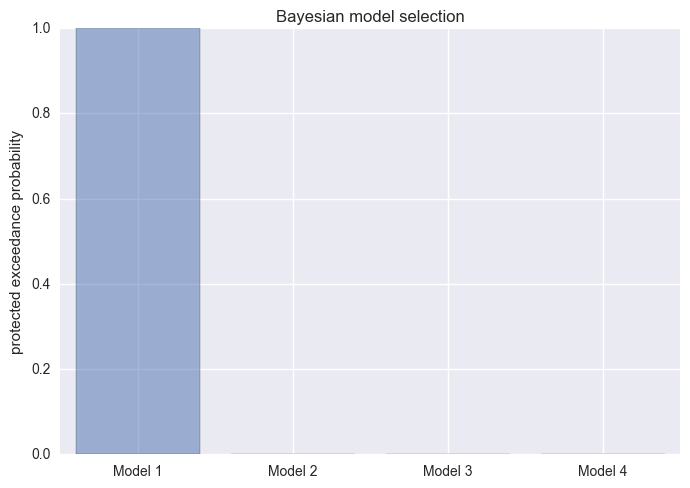

In [28]:
# Bayesian Model Selection (bor = 4.61e-37)
# Model 1: inverse temperature, stickiness, learning rate
# Model 2: inverse temperature, stickiness, gems learning rate, bomb learning rate
# Model 3: inverse temperature, stickiness, positive learning rate, negative learning rate
# Model 4: inverse temperature, stickiness, learning rate, gems preference
models = ('Model 1', 'Model 2', 'Model 3', 'Model 4')
y_pos = np.arange(len(models))
pxp = [1, 0, 0, 0]
plt.bar(y_pos, pxp, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('protected exceedance probability')
plt.title('Bayesian model selection')
plt.show()

In [9]:
# import post-mfit b6 (bandit_either) summary data
#b6 = pd.read_csv('/Volumes/crisp/hinl/bandit/gems_vs_bomb/rez/b6_d25_table.csv')
b6 = pd.read_csv('~/Desktop/bandit/gems_vs_bomb/rez/b6_model_4_table.csv')
data = pd.DataFrame(b6)
#data.describe()

### Experiment 6: inferrential stats   

paired t-test b/w earn & burn: _t_ = 0.0449, _p_ = 0.96

repeated measures ANOVA across doors: _F_ = 0.126, _p_ = 0.94

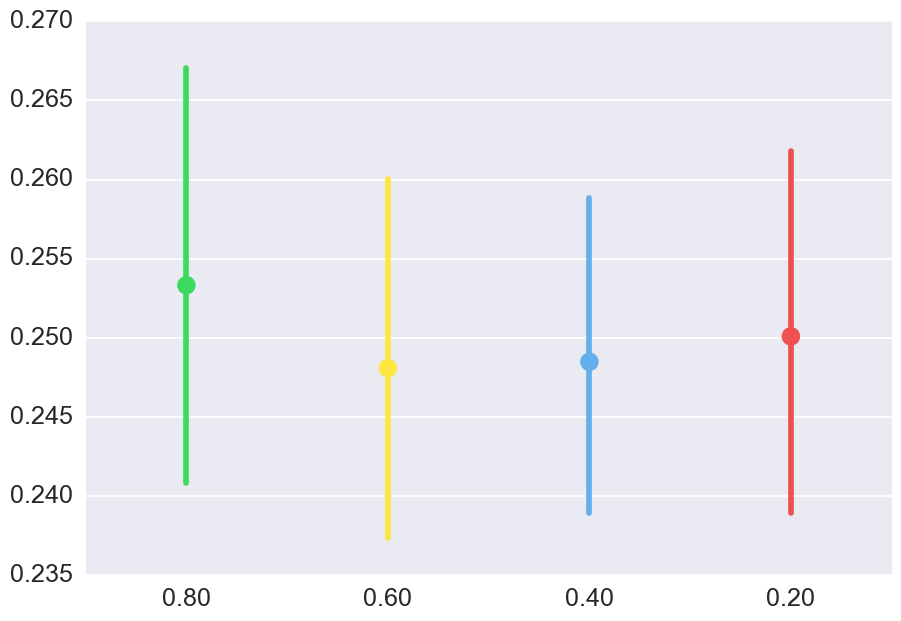

In [3]:
# plot preference for gems in terms of door probability
pDoor = b6[['chose80','chose60','chose40','chose20']]

with sns.plotting_context('talk', font_scale=1.4):

    sns.set_style("darkgrid")
    ax = sns.pointplot(data=pDoor, palette = ['#3DDA60','#fde73f','#62afea','#EF5050'])
    ax.figure.get_axes()[0].set_xticklabels(['0.80','0.60','0.40','0.20'])
    ax.figure.savefig('b6_pointplot')

In [4]:
# regression of behavioral 'preference for burn' on intergroup bias
data = b6[['pEarn','igbias']]
with sns.plotting_context('talk', font_scale=1.2):
    ax = (sns.jointplot(x='igbias', y='pEarn', data=data, kind='reg', annot_kws=dict(stat='r'))
                       .set_axis_labels('intergroup bias', 'preference for earning'))
    ax.savefig('b6_pEarn_x_igbias')
    

KeyError: "['pEarn'] not in index"

/Users/wem3/Envs/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


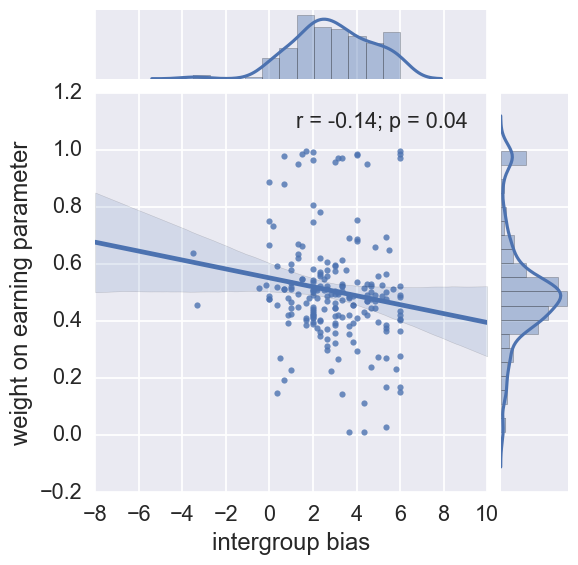

In [11]:
# regression of 'preference for earn' parameter on intergroup bias
data = b6[['wEarn','igbias']]
with sns.plotting_context('talk', font_scale=1.2):
    ax = (sns.jointplot(x='igbias', y='wEarn', data=data, kind='reg', annot_kws=dict(stat='r'))
                       .set_axis_labels('intergroup bias', 'weight on earning parameter'))
    ax.savefig('b6_wEarn_x_igbias')

## Experiment 7: political parties w/ high reward probability  
-participants receive either 'bill' or 'burning bill' type reward on each trial  
-reward type for each door determined by fixed probability [0.8 0.6 0.4 0.2]  
-intergroup bias computed by subtracting outgroup ID from ingroup ID  
-probability of reward same as in Experiment 5 (mean = 0.5)

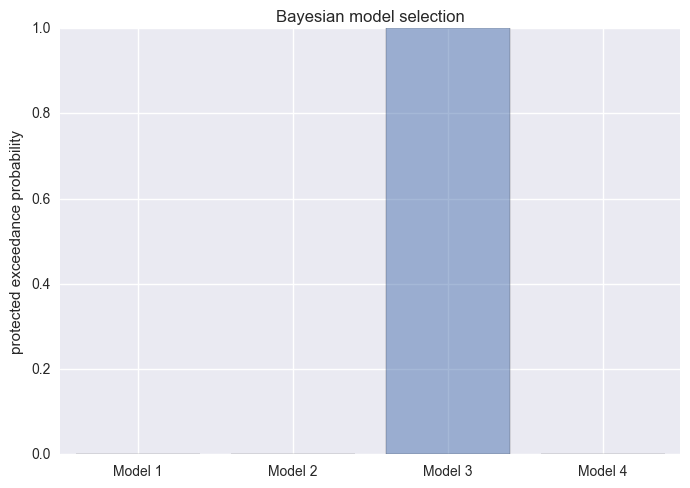

In [38]:
# Bayesian Model Selection (bor = 1.410e-7)
# Model 1: inverse temperature, stickiness, learning rate
# Model 2: inverse temperature, stickiness, gems learning rate, bomb learning rate
# Model 3: inverse temperature, stickiness, positive learning rate, negative learning rate
# Model 4: inverse temperature, stickiness, learning rate, gems preference
models = ('Model 1', 'Model 2', 'Model 3', 'Model 4')
y_pos = np.arange(len(models))
pxp = [0.000001, 0.000001, 0.99999, 0.000001]
plt.bar(y_pos, pxp, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('protected exceedance probability')
plt.title('Bayesian model selection')
plt.show()

In [12]:
# import post-mfit b5 (bandit_either) summary data
#b7 = pd.read_csv('/Volumes/crisp/hinl/bandit/gems_vs_bomb/rez/b7_d25_table.csv')
b7 = pd.read_csv('~/Desktop/bandit/gems_vs_bomb/rez/b7_model_4_table.csv')
data = pd.DataFrame(b7)
data.describe()

,gems,bomb,igbias,pBurn,wEarn,chose80,chose60,chose40,chose20,it,lr,sticky,rt_mean,rt_tot
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,1.960000e+02
mean,108.602041,104.576531,3.024660,0.490700,0.523731,0.271542,0.247307,0.237259,0.243892,10.045946,0.656264,1.039286,588.818821,2.119748e+05
std,17.400407,20.504640,1.743801,0.071047,0.193316,0.133680,0.091423,0.104542,0.124371,4.437558,0.276301,1.201301,442.964312,1.594672e+05
min,42.000000,34.000000,-1.000000,0.231111,0.026781,0.025000,0.000000,0.008333,0.000000,0.546278,0.002541,-3.939137,0.000000,0.000000e+00
25%,97.000000,93.750000,1.666667,0.461528,0.415269,0.190972,0.190972,0.175000,0.174306,6.842878,0.561687,0.444837,347.098611,1.249555e+05
50%,107.500000,105.000000,3.000000,0.500000,0.498339,0.250000,0.237500,0.236111,0.236111,10.209908,0.709072,1.180087,503.444444,1.812400e+05
75%,122.000000,118.000000,4.333333,0.525833,0.586801,0.322222,0.292361,0.295139,0.297917,12.890488,0.827403,1.894040,674.522222,2.428280e+05
max,152.000000,153.000000,6.000000,0.772778,0.997331,0.925000,0.602778,0.680556,0.933333,22.097579,0.997054,4.035045,3586.850000,1.291266e+06


### Experiment 7: inferrential stats   

paired t-test b/w earn & burn: _t_ = 1.7, _p_ = 0.091

repeated measures ANOVA across doors: _F_ = 2.50, _p_ = 0.059

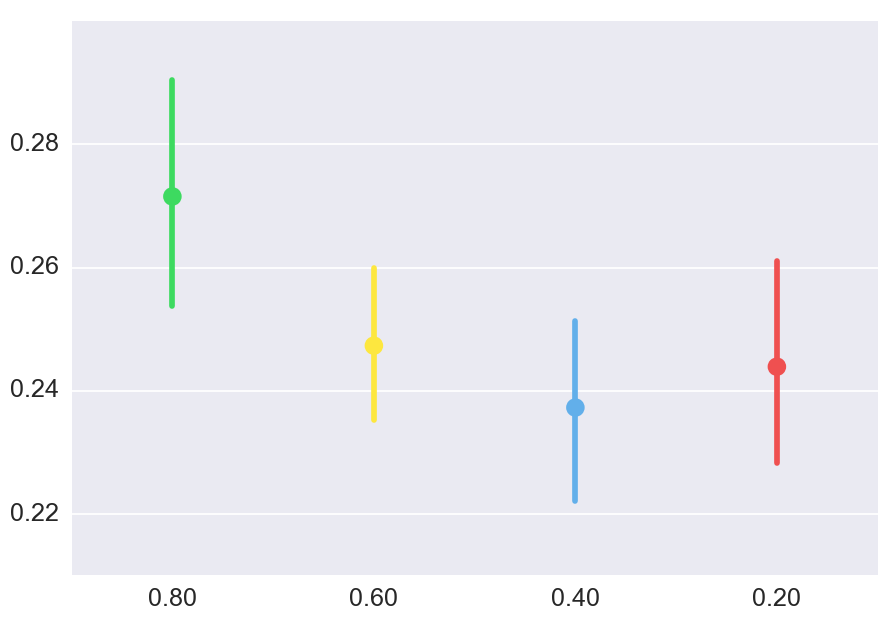

In [41]:
# plot preference for gems in terms of door probability
pDoor = b7[['chose80','chose60','chose40','chose20']]

with sns.plotting_context('talk', font_scale=1.4):

    sns.set_style("darkgrid")
    ax = sns.pointplot(data=pDoor, palette = ['#3DDA60','#fde73f','#62afea','#EF5050'])
    ax.figure.get_axes()[0].set_xticklabels(['0.80','0.60','0.40','0.20'])
    ax.figure.savefig('b7_pointplot')

/Users/wem3/Envs/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


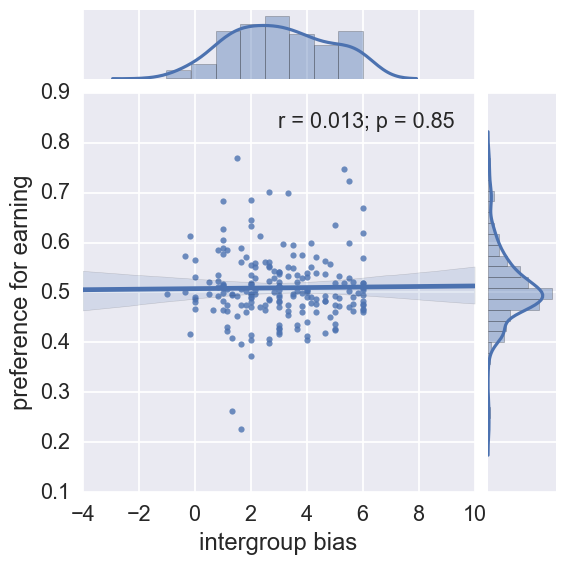

In [55]:
# regression of behavioral 'preference for burn' on intergroup bias
data = b7[['pEarn','igbias']]
with sns.plotting_context('talk', font_scale=1.2):
    ax = (sns.jointplot(x='igbias', y='pEarn', data=data, kind='reg', annot_kws=dict(stat='r'))
                       .set_axis_labels('intergroup bias', 'preference for earning'))
    ax.savefig('b7_pEarn_x_igbias')

/Users/wem3/Envs/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


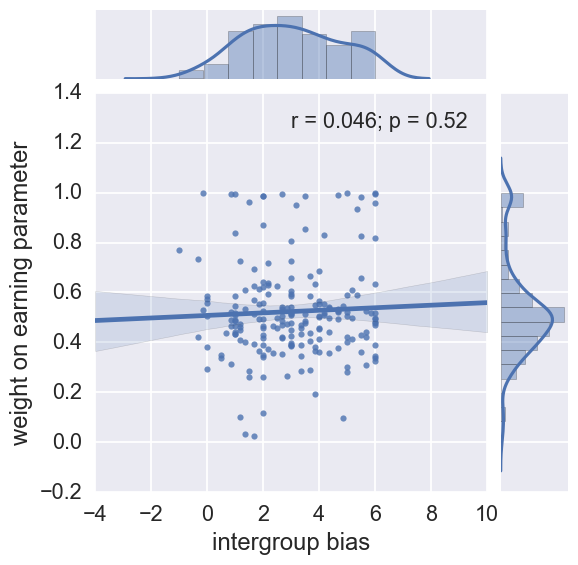

In [14]:
# regression of 'preference for earn' parameter on intergroup bias
data = b7[['wEarn','igbias']]
with sns.plotting_context('talk', font_scale=1.2):
    ax = (sns.jointplot(x='igbias', y='wEarn', data=data, kind='reg', annot_kws=dict(stat='r'))
                       .set_axis_labels('intergroup bias', 'weight on earning parameter'))
    ax.savefig('b7_wEarn_x_igbias')

In [27]:
!pwd

/Users/wem3/Desktop/bandit/gems_vs_bomb/rez
